In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit
import time
%matplotlib inline

In C:\Users\pjmil\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\pjmil\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\pjmil\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\pjmil\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\pjmil\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
# fig_cluster, ax_cluster = plt.subplots(1, 1, tight_layout=True, figsize=(8, 3))

# Upsilon_pi_array = [15.2180398, 2.52076579, 1.45350005, 1.4211961, 1.42800967, 
#                 1.45708777, 1.44332462, 1.4558449, 1.4446084, 1.43328679, 
#                 1.43071976, 1.42978011, 1.43138253, 1.43166573]
# Upsilon_pi_error_array = [8.25826619e+03, 1.38437557e-01, 4.68806177e-02, 2.14086867e-02, 
#                         1.03825041e-02, 9.20518645e-04, 7.03274173e-04, 5.95141817e-04, 
#                         6.96877022e-04, 3.77630442e-04, 2.53927895e-04, 3.03243655e-05, 
#                         3.01836353e-05, 2.98990180e-05]

# ax_cluster.errorbar(x = range(5, 15),
#                    y = Upsilon_pi_array[4:],
#                    yerr = Upsilon_pi_error_array[4:],
#                     marker = 'o', markersize = 6, 
#                    ls = '')

# Upsilon_gamma_array = [1.349455, 1.68608989, 1.57999369, 1.44736522, 1.4915571, 1.44296192, 
#                  1.44798927, 1.44135122, 1.44080323, 1.43234744, 1.43132771, 1.43354105, 
#                  1.4329449]
# Upsilon_gamma_error_array = [1.93426777e-01, 9.80024646e-02, 1.25884806e-02, 1.25204310e-02,
#                  2.85278029e-03, 2.59919281e-03, 8.73808306e-04, 8.89877931e-04,
#                  3.52616668e-04, 1.28382028e-04, 7.40333997e-05, 7.24066842e-05,
#                  3.80721833e-05]

# ax_cluster.errorbar(x = range(6, 15),
#                    y = Upsilon_gamma_array[4:],
#                    yerr = Upsilon_gamma_error_array[4:],
#                     marker = 'o', markersize = 6, 
#                    ls = '')

In [3]:
# digits = list(map(int, open("iteration1_pi.txt").read().splitlines()))
# digits = digits[1:]
# # print(digits[0:100])

In [4]:
# fit_limit = 250000
# plot_limit = 1000

In [5]:
# t_plot_start = time.time()
# fig, ax = plt.subplots(1, 1, tight_layout=True, figsize=(8, 3))
# # fig = plt.figure(figsize = (8, 3))
# N, Bins, _ = plt.hist(digits[0:fit_limit], bins = max(digits[0:fit_limit]))
# ax.set_xscale('log')
# ax.set_yscale('log')
# # plt.yscale('log')
# ax.set_xlim([1, plot_limit])
# # plt.xlim((0, plot_limit))

In [6]:
# t_plot_end = time.time()
# print(t_plot_end - t_plot_start)

In [7]:
# print(N)
# print(np.rint(Bins[:-1]))

In [8]:
# print(len(Bins))
# print(len(N))

In [9]:
# len(np.rint(Bins)) != len(set(np.rint(Bins)))

In [10]:
data_cluster = np.loadtxt("contfract_idx_apery.txt", skiprows = 1, usecols = (1))
# print(data_cluster)

In [11]:
# print("data_cluster has shape " + str(np.shape(data_cluster)))
# bins = data_cluster[:np.shape(data_cluster)[0] // 2]
# print("bins has shape " + str(np.shape(bins)))
# print("bins = " + str(bins))
# hist = data_cluster[np.shape(data_cluster)[0] // 2:]
# print("hist has shape " + str(np.shape(hist)))
# print("hist = " + str(hist))

In [12]:
hist, bins = np.histogram(data_cluster, bins = int(np.max(data_cluster)) - 1)
print(np.shape(hist))
print(hist)
print(np.shape(bins))
print(bins)

(162049,)
[8320 3377 1882 ...    0    0    1]
(162050,)
[1.00000e+00 2.00000e+00 3.00000e+00 ... 1.62048e+05 1.62049e+05
 1.62050e+05]


(0.1, 16640)

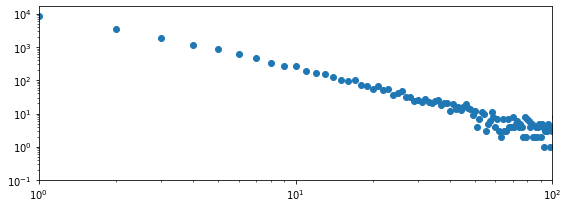

In [13]:
fig, ax = plt.subplots(1, 1, tight_layout=True, figsize=(8, 3))
# fig = plt.figure(figsize = (8, 3))
# N, Bins, _ = plt.hist(digits[0:fit_limit], bins = max(digits[0:fit_limit]))
ax.scatter(bins[:-1], hist)
ax.semilogx()
ax.semilogy()
# ax.set_yscale('log')
# plt.yscale('log')
ax.set_xlim(1, 100)
ax.set_ylim(0.1, 2 * max(hist))

In [14]:
def func_linear(x, P, t):
    return P * x**(-t)

def func_quad(x, C, b, a):
    return C * x**(b) * x**(a * np.log(x))

def func_exp(x, A, B):
    return np.exp(A * x**(B))

In [15]:
popt_linear, pcov_linear = curve_fit(func_linear, bins[:-1], hist)
print(popt_linear)
# popt_quad, pcov_quad = curve_fit(func_quad, np.rint(Bins[:-1]), N)
# print(popt_quad)
# popt_exp, pcov_exp = curve_fit(func_exp, np.rint(Bins[:-1]), N)
# print(popt_exp)
ax.plot(bins, func_linear(bins, *popt_linear))
# ax.plot(np.rint(Bins[0:fit_limit]), func_quad(np.rint(Bins[0:fit_limit]), *popt_quad))
# ax.plot(np.rint(Bins[0:fit_limit]), func_exp(np.rint(Bins[0:fit_limit]), *popt_exp))
ax.set_ylim([10**(0), 10**(5)])
fig.figure

[8.40945194e+03 1.43101328e+00]


Read in data for values of $\Upsilon$ and histogram

In [16]:
pi_Ups = []
pi_Ups_var = []
gamma_Ups = []
gamma_Ups_var = []
apery_Ups = 1.43101328
log2_Ups = 1.4364816
vertline_Ups = [apery_Ups, log2_Ups]

for i in range(1, 93):
    try:
        if i < 10:
            file = open("pi_fit_it0" + str(i) + ".txt")
        else:
            file = open("pi_fit_it" + str(i) + ".txt")
        
        [Ups, var] = list(map(np.float64, file.read().splitlines()))
        pi_Ups.append(Ups)
        pi_Ups_var.append(var)
        file.close()
    except:
        pass
    
print(pi_Ups)
print(pi_Ups_var)

for i in range(1, 42):
    try:
        if i < 10:
            file = open("gamma_fit_it0" + str(i) + ".txt")
        else:
            file = open("gamma_fit_it" + str(i) + ".txt")
        
        [Ups, var] = list(map(np.float64, file.read().splitlines()))
        gamma_Ups.append(Ups)
        gamma_Ups_var.append(var)
        file.close()
    except:
        pass
    
print(gamma_Ups)

[1.431574938792727, 1.4317134626252588, 1.4317716673837833, 1.4317730606265844, 1.4317063997114219, 1.4317551069540364, 1.4316909780839726, 1.4316145522403279, 1.4318706447129692, 1.4317634488324043, 1.431525347046889, 1.4316595648890544, 1.4318194341928234, 1.431794660897076, 1.431828406501585, 1.43172948164273, 1.4316582556146344, 1.4316666860563625, 1.4317984552892697, 1.4317476036790693, 1.4315210175292343, 1.431731960827316, 1.4316509359942031, 1.4317954971179623, 1.4319093569717034, 1.4317541332884216, 1.4316727679821848, 1.4318083337699243, 1.4316371442979925, 1.4318682629715294, 1.4317324111960175, 1.4317981715197856, 1.4316228380756997, 1.4317789154206524, 1.4318539104948995, 1.4317548979397443, 1.431687657208566, 1.431648927220619, 1.4315777479730822, 1.4316957012120757, 1.4319235859912183, 1.431669278742055, 1.4317501419281147, 1.4318005044885591, 1.4316530683132134, 1.4316887948533605]
[3.357962388985873e-06, 9.39818309274699e-06, 3.4080064024986635e-06, 5.206101961876244e-

pi mean: 1.4317302
gamma mean: 1.4317646


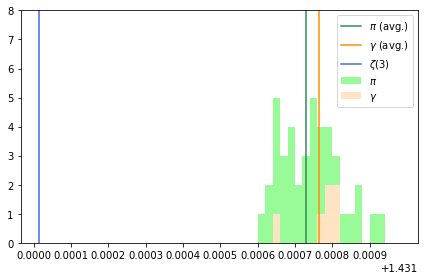

In [20]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=1, ncols=1)

constants_list = ["pi", "gamma"]
hist_labels_dict = {"pi" : r'$\pi$', "gamma" : r'$\gamma$'}
hist_colors_dict = {"pi" : "palegreen", "gamma" : "bisque"}
vertline_list = ["apery"]
vertline_vals_dict = {"apery" : 1.43101328, "log2" : 1.4364816}
vertline_labels_dict = {"apery" : r'$\zeta(3)$', "log2" : r'ln(2)', 
                       "pi" : r'$\pi$ (avg.)', "gamma" : r'$\gamma$ (avg.)'}
vertline_colors_dict = {"apery" : "royalblue", "log2" : "gold", 
                       "pi" : "seagreen", "gamma" : "darkorange"}

hist_bins = np.arange(1.43160, 1.432, 0.00002)

hist_data = []
hist_data.append(pi_Ups)
hist_data.append(gamma_Ups)
hist_data_error = []
hist_data_error.append(pi_Ups_var)
hist_data_error.append(gamma_Ups_var)

axes.hist(hist_data[0], 
        hist_bins, 
        histtype='bar', 
        stacked=False, 
        label = [hist_labels_dict[l] for l in ["pi"]], 
        color = [hist_colors_dict[l] for l in ["pi"]])
axes.hist(hist_data[1], 
        hist_bins, 
        histtype='bar', 
        stacked=False, 
        label = [hist_labels_dict[l] for l in ["gamma"]], 
        color = [hist_colors_dict[l] for l in ["gamma"]])

for (const, dat, err) in zip(constants_list, hist_data, hist_data_error):
    mean = np.around(np.average(dat, weights = np.array(err)**(-2)), 
                     decimals = 7)
    print(const + " mean: " + str(mean))
    vertline_vals_dict[const] = mean

for l in constants_list + vertline_list:
    axes.axvline(vertline_vals_dict[l],
                 label = vertline_labels_dict[l], color = vertline_colors_dict[l])

axes.set_xticks(np.arange(1.431, 1.432, 0.0001))
axes.set_ylim(0, 8)

axes.legend()

fig.tight_layout()
plt.show()